In [6]:
from nilearn import image, plotting
import numpy as np

## Roi File

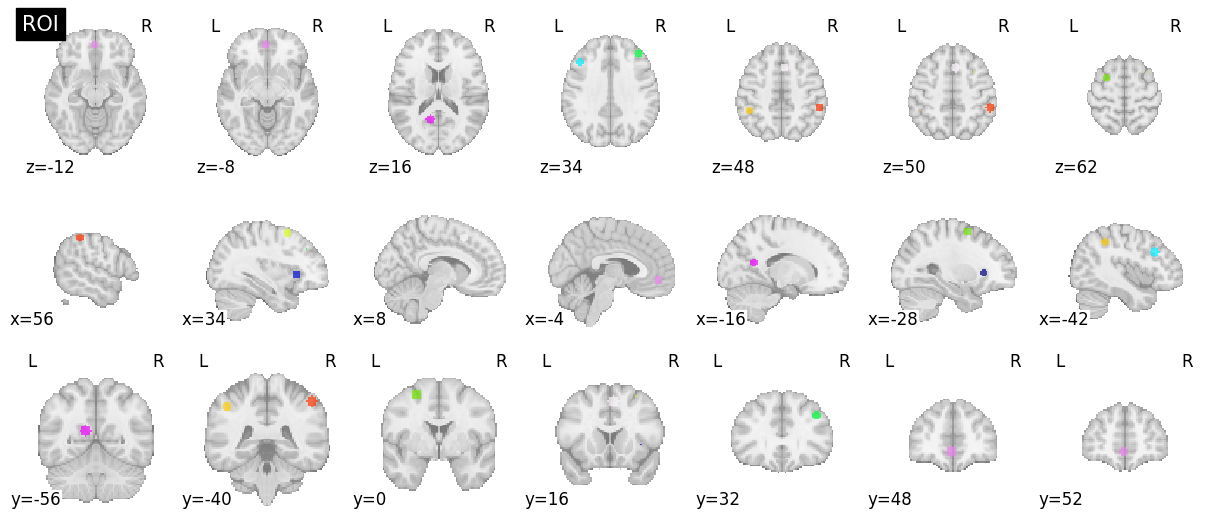

In [7]:
roi_file = "grantmask_labeled.nii"

plotting.plot_roi(roi_file, display_mode='mosaic',  title="ROI")

In [8]:
roi_mask_image = image.load_img(roi_file)

roi_mask_data = roi_mask_image.get_fdata()

print("ROI mask data shape: ", roi_mask_data.shape)

# find non-zero indices
roi_mask_indices = np.argwhere(roi_mask_data)

print("ROI mask indices shape: ", roi_mask_indices[0].shape)

roi_mask_indices

ROI mask data shape:  (91, 109, 91)
ROI mask indices shape:  (3,)


array([[16, 43, 61],
       [17, 41, 60],
       [17, 41, 61],
       ...,
       [70, 43, 58],
       [70, 43, 59],
       [71, 41, 58]])

# Test ROI Extract function

In [4]:
import utils

# roi_values, _, _ = utils.roi_extract_all_node_func()

TypeError: cannot unpack non-iterable function object

## Test Masking a 4D image with a 3D mask (not registered)

/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



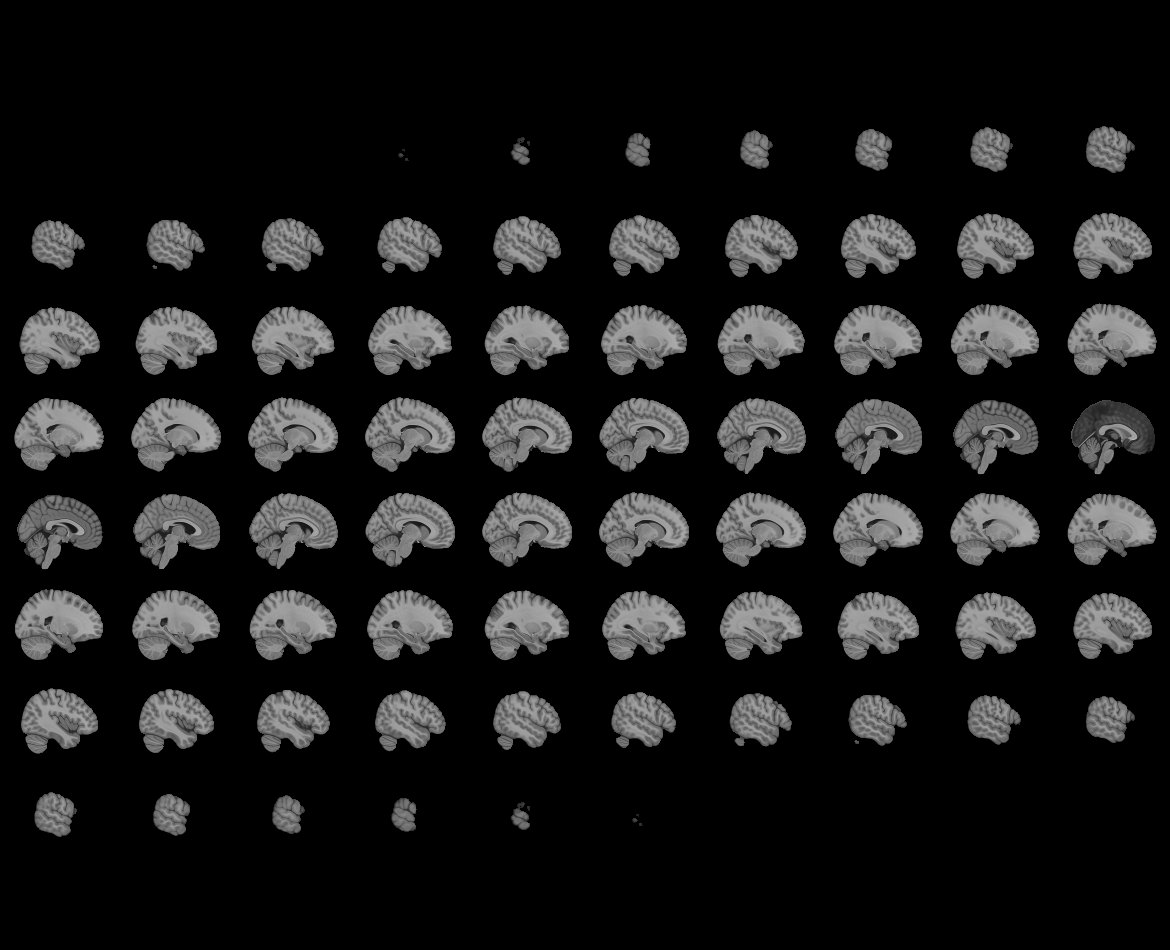
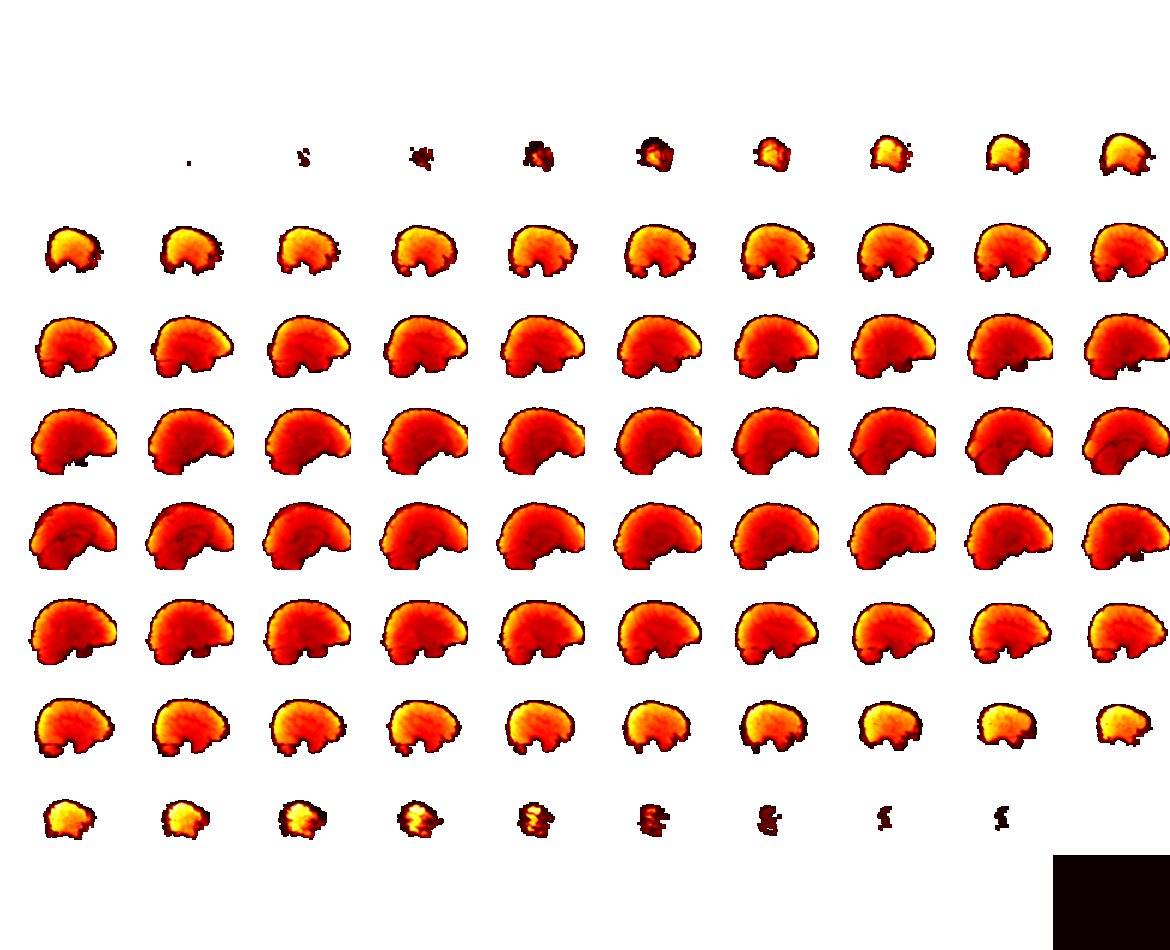

In [ ]:
test_image_path = "/mnt/storage/daniel/feat-preprocess-datasink/sub-NDARINVZT44Y065_ses-baselineYear1Arm1_task-sst_run-01NL.feat/filtered_func_data.nii.gz"

test_image = image.load_img(test_image_path)

first_volume = image.index_img(test_image, 0)

plotting.view_img(first_volume, 
                title="Test filtered func")

## Check number of zfstat paths

In [9]:
import utils
import constants

feat_datasink = constants.INPUT_FEAT_DATASINK

linear_zfstat_paths = utils.get_all_zfstat_paths_from_feat_datasink(feat_datasink, verbose=False, type="linear")

print(f"Found {len(linear_zfstat_paths)} linear zfstat paths")

nonlinear_zfstat_paths = utils.get_all_zfstat_paths_from_feat_datasink(feat_datasink, verbose=False, type="nonlinear")

print(f"Found {len(nonlinear_zfstat_paths)} nonlinear zfstat paths")

print("Some linear zfstat paths: ", linear_zfstat_paths[:3])
print("Some nonlinear zfstat paths: ", nonlinear_zfstat_paths[:3])

Found 3870 linear zfstat paths
Found 3870 nonlinear zfstat paths
Some linear zfstat paths:  ['/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_LN.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2_LN.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat3_LN.nii.gz']
Some nonlinear zfstat paths:  ['/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_NL.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2_NL.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-b

In [10]:
zfstat_paths, affine_files = utils.get_all_zfstat_paths_and_affine_files_from_feat_datasink(feat_datasink)

print(f"Found {len(zfstat_paths)} zfstat paths and {len(affine_files)} affine files")

for i in range(0, 10):
    shortened_zfstat_path = zfstat_paths[i].split("/")    
    shortened_zfstat_path = "/".join(shortened_zfstat_path[6:])
    
    shortened_affine_path = affine_files[i].split("/")    
    shortened_affine_path = "/".join(shortened_affine_path[6:])
    
    print(f"{shortened_zfstat_path} -> {shortened_affine_path}")

Found 3870 zfstat paths and 3870 affine files
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat3.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat4.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat5.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYe

In [11]:
from importlib import reload
import utils
reload(utils)
import utils

## Check Registration

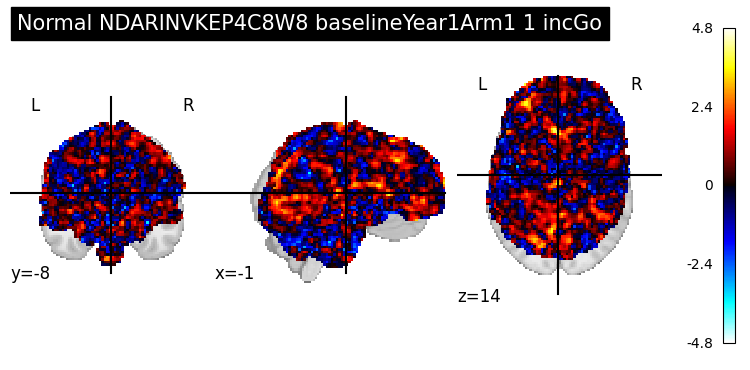

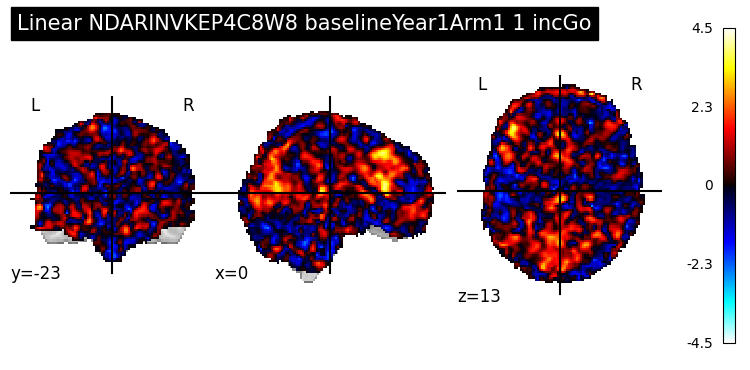

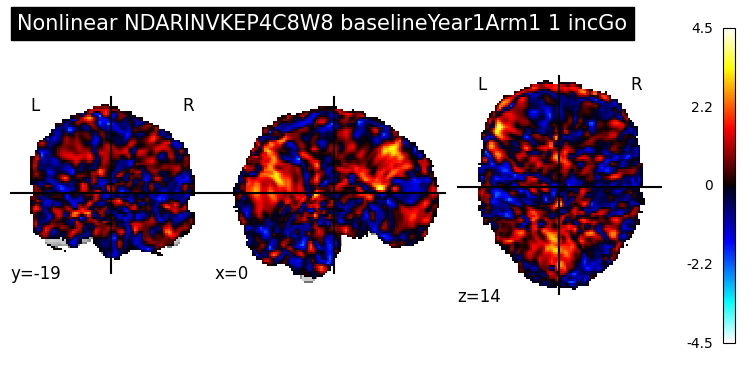

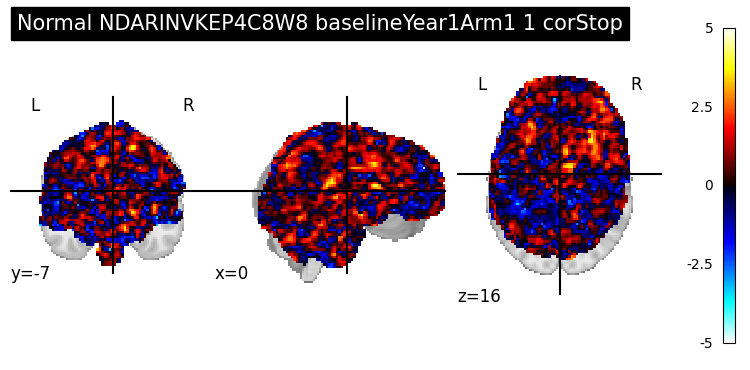

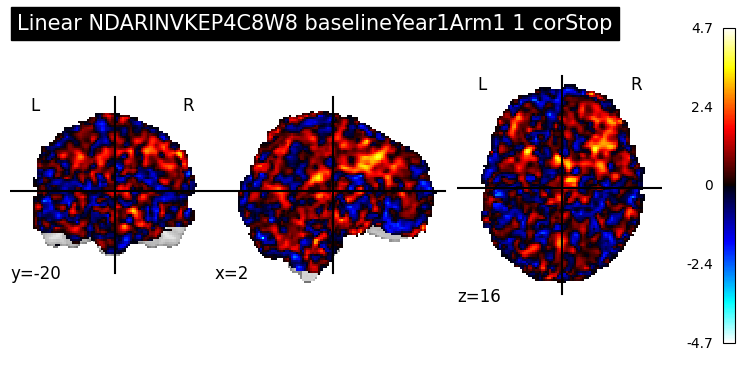

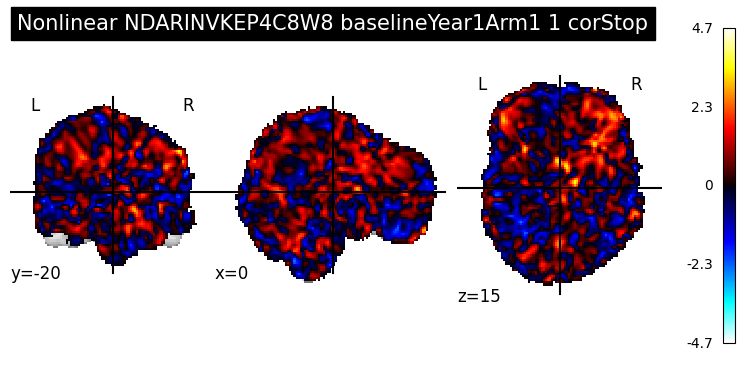

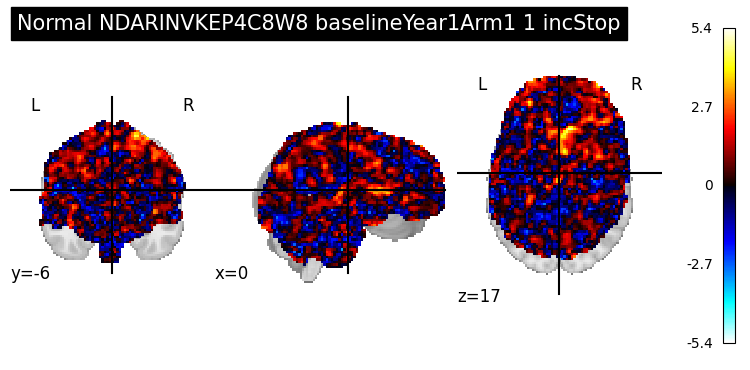

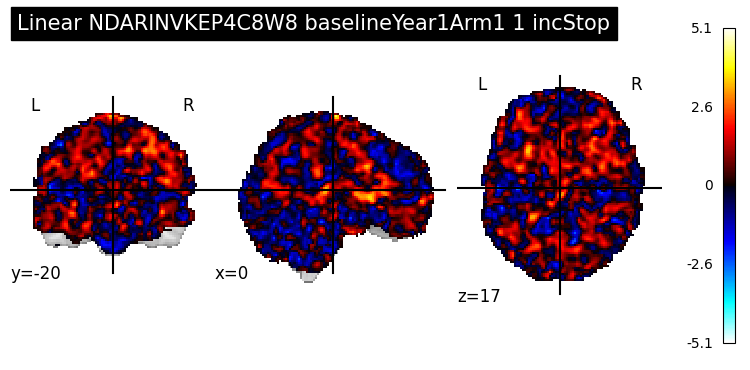

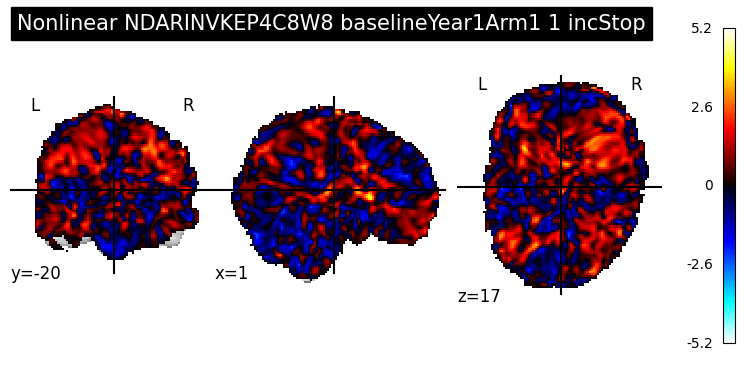

In [12]:
# index = 3000

# zfstat_image = image.load_img(nonlinear_zfstat_paths[index])

# plotting.view_img(zfstat_image, title=f"Nonlinear zfstat {index}")
import regex as re
import utils


for index in range(67, 70):
    subject_id = utils.get_subject_id_from_zfstat_path(nonlinear_zfstat_paths[index])
    run = utils.get_run_from_zfstat_path(nonlinear_zfstat_paths[index])
    image_name = utils.get_image_name_from_zfstat_path(nonlinear_zfstat_paths[index])
    session = utils.get_session_from_zfstat_path(nonlinear_zfstat_paths[index])
        
    
    normal_zfstat_image = image.load_img(zfstat_paths[index])      
    linear_zfstat_image = image.load_img(linear_zfstat_paths[index])
    nonlinear_zfstat_image = image.load_img(nonlinear_zfstat_paths[index])                
    
    
    plotting.plot_stat_map(normal_zfstat_image, display_mode='ortho',  title=f"Normal {subject_id} {session} {run} {image_name}")
    plotting.plot_stat_map(linear_zfstat_image, display_mode='ortho',  title=f"Linear {subject_id} {session} {run} {image_name}")
    plotting.plot_stat_map(nonlinear_zfstat_image, display_mode='ortho',  title=f"Nonlinear {subject_id} {session} {run} {image_name}")

# plotting.plot_stat_map(zfstat_image, display_mode='mosaic',  title=f"Nonlinear zfstat {index}")

## Checking Registrations

In [13]:
# mni_image = image.load_img(constants.MNI_TEMPLATE)

# print(f"MNI image shape: {mni_image.shape}")

# mni_image_data = mni_image.get_fdata()

# def check_registration_quality_mni(registered_image_path: str) -> bool:
#     # Load the registered image and MNI template
#     registered_image = image.load_img(registered_image_path)    

#     # Get the data from the images
#     registered_image_data = registered_image.get_fdata()    

#     # Check for non-zero values outside the MNI template
#     outside_mask = (mni_image_data == 0) & (registered_image_data != 0)

#     is_any_outside = np.any(outside_mask)

#     print(f"Non-zero values outside the MNI template: {is_any_outside}")

#     if np.any(outside_mask):
#         print(f"Warning: Non-zero values found outside the MNI template for {registered_image_path}")
#         return False
#     else:
#         print(f"Registration quality is good for {registered_image_path}")
#         return True

# # Test the function
# res = check_registration_quality_mni(nonlinear_zfstat_paths[2])
# print(f"zfstat_paths[0]: {nonlinear_zfstat_paths[0]} -> {res}")              

## Sanity Checks for ROI Activations CSV File

### Test Dataframe

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
test_df = pd.read_csv('testdatasink/roi_csv/roi_activations.csv')

test_df.head()

# rename 'avg' column to 'activation'
test_df.rename(columns={'avg': 'activation'}, inplace=True)

# change all values in activation column to be random values between -10 and 10
test_df['activation'] = np.random.uniform(-10, 10, test_df.shape[0])

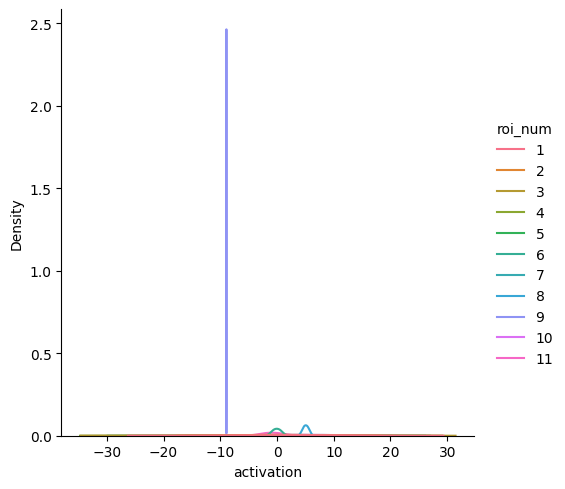

In [ ]:
sns.displot(test_df.astype({"roi_num":"category"}), x="activation", hue="roi_num", kind="kde")

## Real roi activations file

In [34]:
roi_activations_df = pd.read_csv("/mnt/storage/daniel/roi-datasink/roi_csv/_force_run_False_mni_template_..usr..local..fsl..data..standard..MNI152_T1_2mm_brain.nii.gz_nonlinear_False/roi_activations.csv")

# rename 'avg' column to 'activation'
roi_activations_df.rename(columns={'avg': 'activation'}, inplace=True)

roi_activations_df.head()

roi_value  x_coord  y_coord  z_coord  roi_num       subject_id  run  \
0   0.531260       58       75       37        1  NDARINVY6FE3R8A    2   
1   0.821149       59       73       36        1  NDARINVY6FE3R8A    2   
2   0.505634       59       73       37        1  NDARINVY6FE3R8A    2   
3   0.068516       59       73       38        1  NDARINVY6FE3R8A    2   
4   0.343551       59       74       35        1  NDARINVY6FE3R8A    2   

  image_name  is_nonlinear            session  
0      corGo         False  baselineYear1Arm1  
1      corGo         False  baselineYear1Arm1  
2      corGo         False  baselineYear1Arm1  
3      corGo         False  baselineYear1Arm1  
4      corGo         False  baselineYear1Arm1

### Adding Group column

In [38]:
import numpy as np

def add_group_column(roi_activations_df: pd.DataFrame) -> pd.DataFrame:
    with open("../subjects/pilot_anx_subjects.txt") as f:
        pilot_anx_subject_ids = f.read().splitlines()
    
    # with open("../subjects/subject_same_mri.txt") as f:        
    #     lines = f.read().splitlines()
        
    #     original_50_subject_ids = []
        
    #     for subject_id in lines:
    #         if subject_id not in pilot_anx_subject_ids:
    #             original_50_subject_ids.append(subject_id)
    
    roi_activations_df['group'] = np.where(roi_activations_df['subject_id'].isin(pilot_anx_subject_ids), 'pilot_anx', 'original_50')
    
    return roi_activations_df

roi_activations_df = add_group_column(roi_activations_df)

print(roi_activations_df["group"].value_counts())

roi_activations_df.head()    

group
pilot_anx      3920994
original_50    1315116
Name: count, dtype: int64


roi_value  x_coord  y_coord  z_coord  roi_num       subject_id  run  \
0   0.531260       58       75       37        1  NDARINVY6FE3R8A    2   
1   0.821149       59       73       36        1  NDARINVY6FE3R8A    2   
2   0.505634       59       73       37        1  NDARINVY6FE3R8A    2   
3   0.068516       59       73       38        1  NDARINVY6FE3R8A    2   
4   0.343551       59       74       35        1  NDARINVY6FE3R8A    2   

  image_name  is_nonlinear            session      group  
0      corGo         False  baselineYear1Arm1  pilot_anx  
1      corGo         False  baselineYear1Arm1  pilot_anx  
2      corGo         False  baselineYear1Arm1  pilot_anx  
3      corGo         False  baselineYear1Arm1  pilot_anx  
4      corGo         False  baselineYear1Arm1  pilot_anx

In [ ]:
# roi_activations_df.groupby(['group', 'roi_num']).mean()

TypeError: agg function failed [how->mean,dtype->object]

## Checking ROI Activations

In [36]:
roi_activations_df["subject_id"].nunique()

186

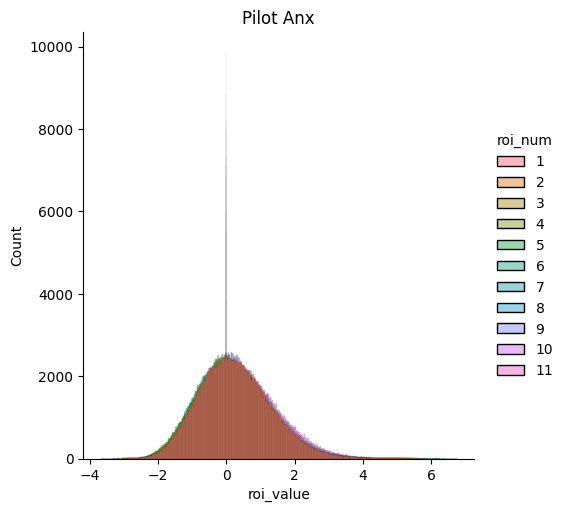

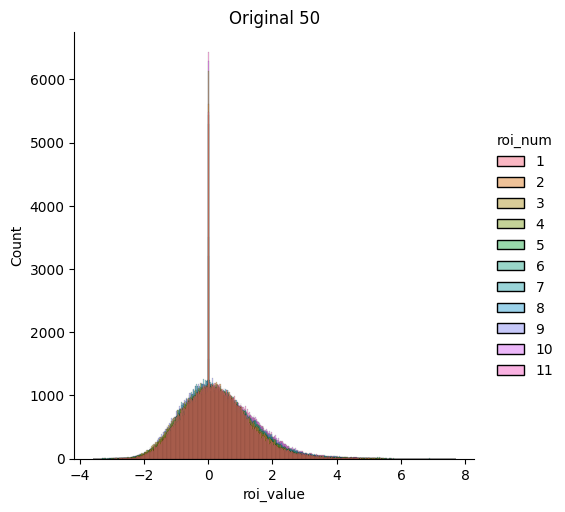

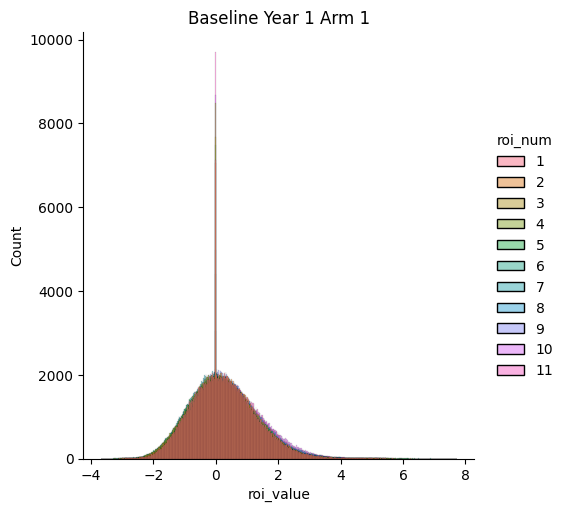

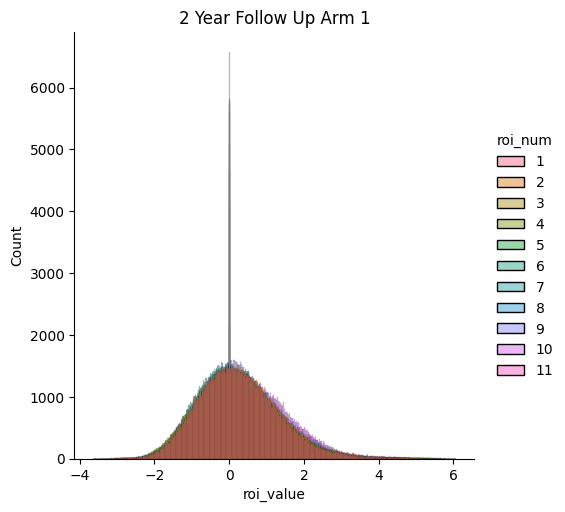

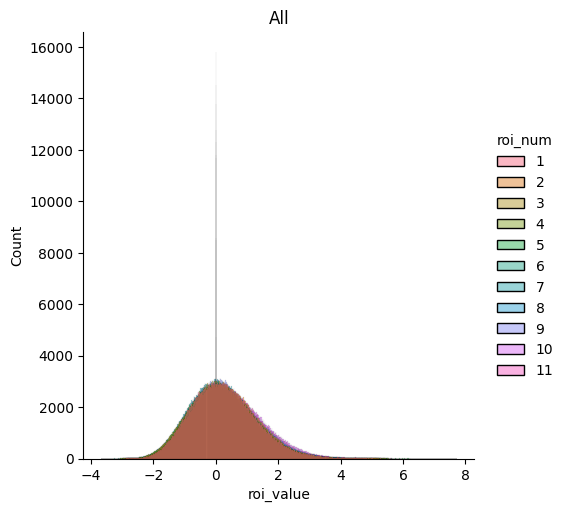

In [40]:
import seaborn as sns

# filter by group = pilot_anx
f1 = sns.displot(roi_activations_df[roi_activations_df["group"] == "pilot_anx"].astype({"roi_num":"category"}), x="roi_value", hue="roi_num", kind="hist")
f1.set(title="Pilot Anx")

f2 = sns.displot(roi_activations_df[roi_activations_df["group"] == "original_50"].astype({"roi_num":"category"}), x="roi_value", hue="roi_num", kind="hist")
f2.set(title="Original 50")

# filter by session
f3 = sns.displot(roi_activations_df[roi_activations_df["session"] == "baselineYear1Arm1"].astype({"roi_num":"category"}), x="roi_value", hue="roi_num", kind="hist")
f3.set(title="Baseline Year 1 Arm 1")

f4 = sns.displot(roi_activations_df[roi_activations_df["session"] == "2YearFollowUpYArm1"].astype({"roi_num":"category"}), x="roi_value", hue="roi_num", kind="hist")
f4.set(title="2 Year Follow Up Arm 1")

# all
f5 = sns.displot(roi_activations_df.astype({"roi_num":"category"}), x="roi_value", hue="roi_num", kind="hist")
f5.set(title="All")

### Run T-Tests

In [ ]:
import scipy.stats as st

In [ ]:
grouped_p_value_df = roi_activations_df.groupby(["group", "subject_id", "image_name","run","roi_num"])["activation"]

i = 0

def agg_func(group: pd.Series):
    global i
    if i < 5:
        print(group)
    i += 1
    return st.ttest_1samp(group, popmean=0).pvalue

grouped_p_value_df = grouped_p_value_df.agg(agg_func)

grouped_p_value_df

28908   -0.820147
40392    0.934333
Name: activation, dtype: float64
28909   -0.517859
40393    0.684735
Name: activation, dtype: float64
28910   -1.039959
40394   -0.587847
Name: activation, dtype: float64
28911   -1.602880
40395    0.300729
Name: activation, dtype: float64
28912   -1.445293
40396   -0.456265
Name: activation, dtype: float64


/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


group        subject_id       image_name     run  roi_num
original_50  NDARINV00CY2MDM  corGo          1    1          0.958625
                                                  2          0.912221
                                                  3          0.172470
                                                  4          0.618069
                                                  5          0.305329
                                                               ...   
pilot_anx    NDARINVZT44Y065  incStopvcorGo  2    7               NaN
                                                  8               NaN
                                                  9               NaN
                                                  10              NaN
                                                  11              NaN
Name: activation, Length: 24288, dtype: float64

In [ ]:
p_value_df = grouped_p_value_df.reset_index().rename(columns={"activation": "p_value"})

print(f"num nans: {p_value_df['p_value'].isna().sum()} out of {p_value_df.shape[0]}")

print(f"num p_values greater than 0.05: {p_value_df[p_value_df['p_value'] > 0.05].shape[0]} out of {p_value_df.shape[0]}")

print(f"num p_values greater than 0.1: {p_value_df[p_value_df['p_value'] > 0.1].shape[0]} out of {p_value_df.shape[0]}")

print(f"num p_values greater than 0.05 for each group (pilot_anx, original_50): {p_value_df[p_value_df['p_value'] > 0.05].groupby('group').size()}")

p_value_df.head()

num nans: 8922 out of 24288
num p_values greater than 0.05: 14586 out of 24288
num p_values greater than 0.1: 13740 out of 24288
num p_values greater than 0.05 for each group (pilot_anx, original_50): group
original_50     3717
pilot_anx      10869
dtype: int64


group       subject_id image_name  run  roi_num   p_value
0  original_50  NDARINV00CY2MDM      corGo    1        1  0.958625
1  original_50  NDARINV00CY2MDM      corGo    1        2  0.912221
2  original_50  NDARINV00CY2MDM      corGo    1        3  0.172470
3  original_50  NDARINV00CY2MDM      corGo    1        4  0.618069
4  original_50  NDARINV00CY2MDM      corGo    1        5  0.305329

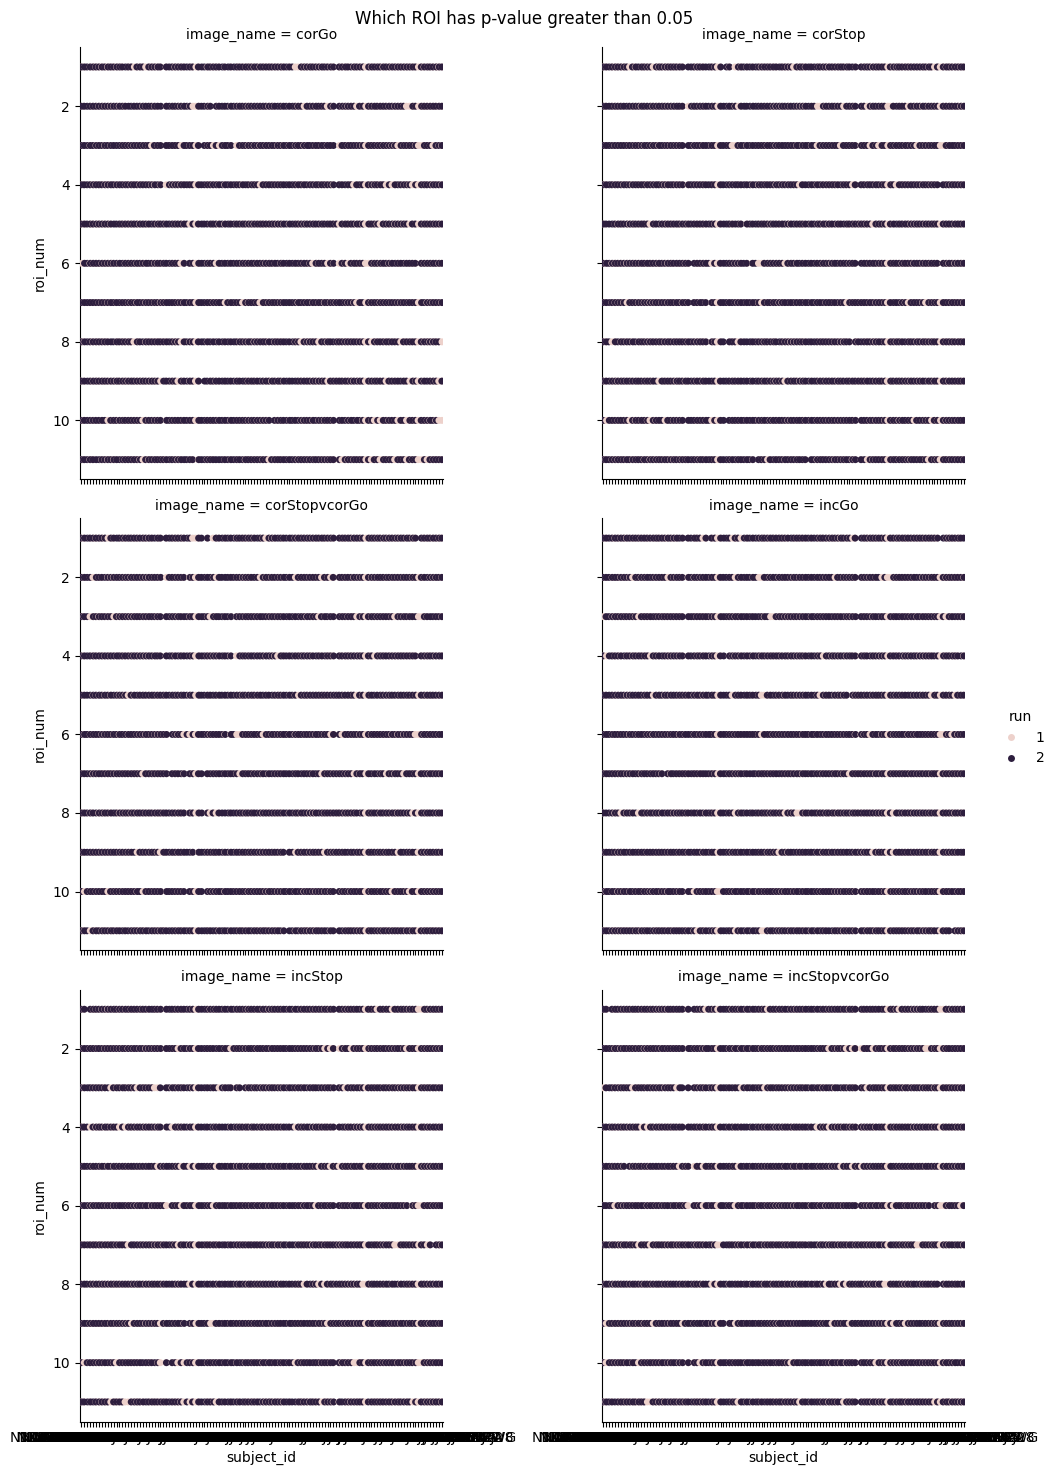

In [ ]:
p_values_greater = p_value_df[p_value_df["p_value"] > 0.05].astype({"roi_num":"category"})

g = sns.catplot(p_values_greater, x="subject_id",y="roi_num", hue="run",col="image_name",col_wrap=2)
g.figure.suptitle("Which ROI has p-value greater than 0.05")
g.figure.tight_layout()

In [ ]:
bad_roi_count_df = p_value_df[p_value_df["p_value"] > 0.05].groupby(["subject_id", "image_name", "run"])["roi_num"].count().reset_index()#["subid"].unique()

bad_roi_count_df = bad_roi_count_df.rename(columns={"roi_num": "bad_roi_count"})

bad_roi_count_df

subject_id     image_name  run  bad_roi_count
0     NDARINV00CY2MDM          corGo    1             11
1     NDARINV00CY2MDM          corGo    2             10
2     NDARINV00CY2MDM        corStop    1             11
3     NDARINV00CY2MDM        corStop    2             11
4     NDARINV00CY2MDM  corStopvcorGo    1             11
...               ...            ...  ...            ...
1405  NDARINVZMMCVRWG          incGo    2             11
1406  NDARINVZMMCVRWG        incStop    1             11
1407  NDARINVZMMCVRWG        incStop    2             11
1408  NDARINVZMMCVRWG  incStopvcorGo    1             11
1409  NDARINVZMMCVRWG  incStopvcorGo    2             11

[1410 rows x 4 columns]

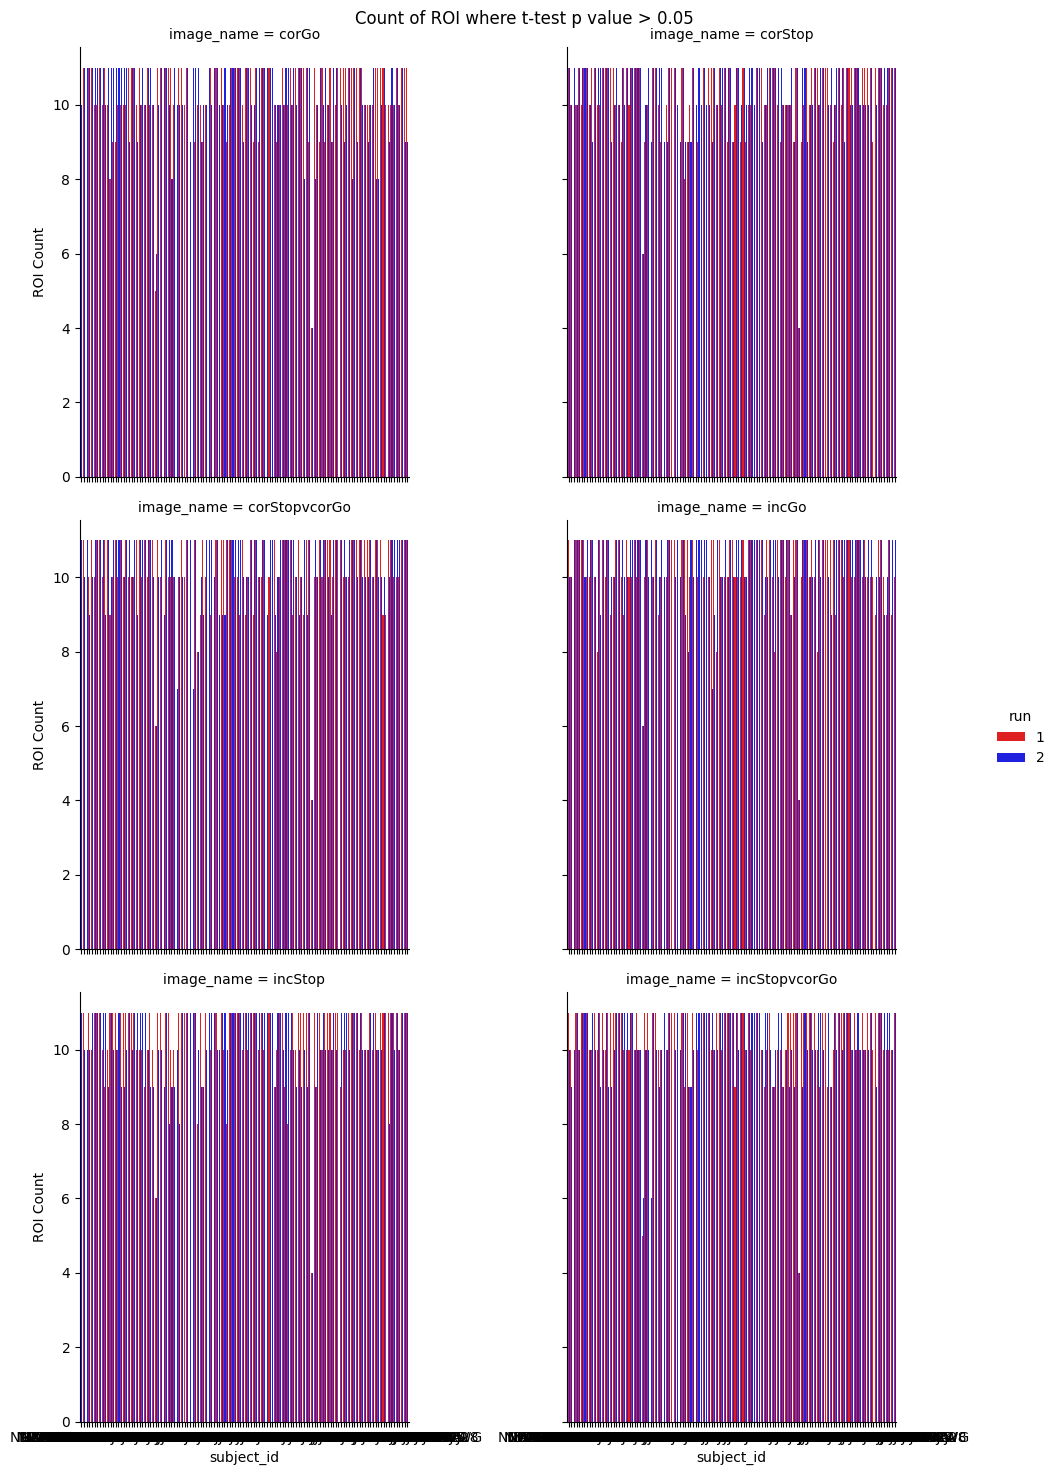

In [ ]:
run_colors = {1: "red", 2: "blue"}

g = sns.catplot(bad_roi_count_df, x="subject_id",y="bad_roi_count", hue="run", col="image_name", kind="bar", col_wrap=2, palette=run_colors)
g.set_ylabels("ROI Count")
g.figure.suptitle("Count of ROI where t-test p value > 0.05")
g.tight_layout()

# Roi Activation with Coordinates

In [2]:
import pandas as pd

In [3]:
df_with_coords = pd.read_csv("./csvs/roi_activations_xyz_fixed.csv")

df_with_coords.groupby(["session", "subject_id", "image_name", "run", "roi_num"]).count()

roi_value  \
session            subject_id      image_name    run roi_num              
2YearFollowUpYArm1 NDARINV00CY2MDM corGo         1   1              123   
                                                     2              123   
                                                     3              123   
                                                     4              123   
                                                     5              123   
...                                                                 ...   
baselineYear1Arm1  NDARINVZT44Y065 incStopvcorGo 2   7              123   
                                                     8              123   
                                                     9              123   
                                                     10             123   
                                                     11             123   

                                                              x_coord  \
session            subject_id      image_name    run roi_num            
2YearFollowUpYArm1 NDARINV00CY2MDM corGo         1   1            123   
                                                     2            123   
                                                     3            123   
                                                     4            123   
                                                     5            123   
...                                                               ...   
baselineYear1Arm1  NDARINVZT44Y065 incStopvcorGo 2   7            123   
                                                     8            123   
                                                     9            123   
                                                     10           123   
                                                     11           123   

                                                              y_coord  \
session            subject_id      image_name    run roi_num            
2YearFollowUpYArm1 NDARINV00CY2MDM corGo         1   1            123   
                                                     2            123   
                                                     3            123   
                                                     4            123   
                                                     5            123   
...                                                               ...   
baselineYear1Arm1  NDARINVZT44Y065 incStopvcorGo 2   7            123   
                                                     8            123   
                                                     9            123   
                                                     10           123   
                                                     11           123   

                                                              z_coord  \
session            subject_id      image_name    run roi_num            
2YearFollowUpYArm1 NDARINV00CY2MDM corGo         1   1            123   
                                                     2            123   
                                                     3            123   
                                                     4            123   
                                                     5            123   
...                                                               ...   
baselineYear1Arm1  NDARINVZT44Y065 incStopvcorGo 2   7            123   
                                                     8            123   
                                                     9            123   
                                                     10           123   
                                                     11           123   

                                                              is_nonlinear  
session            subject_id      image_name    run roi_num                
2YearFollowUpYArm1 NDARINV00CY2MDM corGo         1   1                 123  
     

In [4]:
import matplotlib.pyplot as plt


# get first 10 subjects
subject_ids = df_with_coords["subject_id"].unique()[:10]

filtered_df = df_with_coords[df_with_coords["subject_id"].isin(subject_ids)]

/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


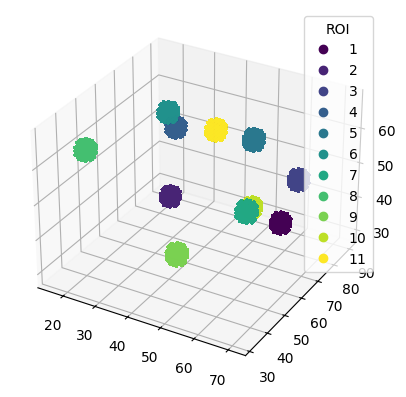

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

scatter = ax.scatter(filtered_df["x_coord"], filtered_df["y_coord"], filtered_df["z_coord"], c=filtered_df["roi_num"], s=1)
ax.legend(*scatter.legend_elements(), title="ROI")


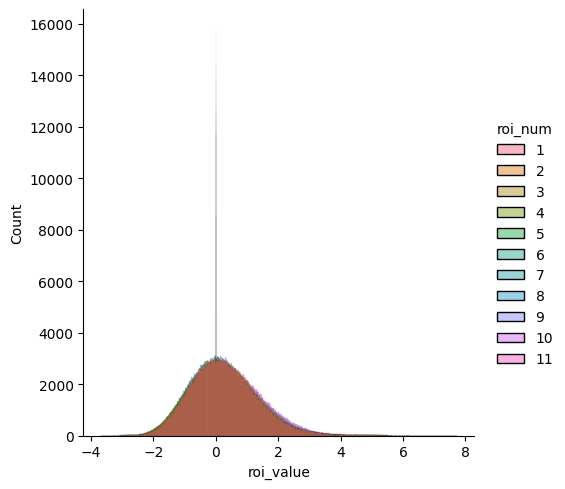

In [5]:
import seaborn as sns

sns.displot(df_with_coords.astype({"roi_num":"category"}), x="roi_value", hue="roi_num", kind="hist")

In [ ]:
# subjects with activation > 6

print(f"{df_with_coords[df_with_coords["roi_value"] > 6]["subject_id"].unique()} unique subjects with activation > 6")

greater_than_6_df = df_with_coords[df_with_coords["roi_value"] > 6]

greater_than_6_df

['NDARINVR12GH8DH' 'NDARINV930295U4' 'NDARINVCPMC364N' 'NDARINV00UMK5VC'
 'NDARINV83ZDBYTJ'] unique subjects with activation > 6


roi_value  x_coord  y_coord  z_coord  roi_num       subject_id  run  \
570105    6.178510       55       64       65        5  NDARINVR12GH8DH    2   
570110    6.156705       56       63       64        5  NDARINVR12GH8DH    2   
570111    6.167111       56       63       65        5  NDARINVR12GH8DH    2   
570114    6.210059       56       64       63        5  NDARINVR12GH8DH    2   
570115    6.361686       56       64       64        5  NDARINVR12GH8DH    2   
...            ...      ...      ...      ...      ...              ...  ...   
3460350   6.156627       32       69       62        6  NDARINV00UMK5VC    2   
3460358   6.894487       33       68       64        6  NDARINV00UMK5VC    2   
4685210   6.162422       44       88       33       10  NDARINV83ZDBYTJ    2   
4685214   6.192304       44       89       33       10  NDARINV83ZDBYTJ    2   
4685238   6.111311       45       89       33       10  NDARINV83ZDBYTJ    2   

        image_name  is_nonlinear            session  
570105       incGo         False  baselineYear1Arm1  
570110       incGo         False  baselineYear1Arm1  
570111       incGo         False  baselineYear1Arm1  
570114       incGo         False  baselineYear1Arm1  
570115       incGo         False  baselineYear1Arm1  
...            ...           ...                ...  
3460350      incGo         False  baselineYear1Arm1  
3460358      incGo         False  baselineYear1Arm1  
4685210      corGo         False  baselineYear1Arm1  
4685214      corGo         False  baselineYear1Arm1  
4685238      corGo         False  baselineYear1Arm1  

[105 rows x 10 columns]

In [6]:
# number of subjects with activation = 0

num_subjects_with_activation_0 = df_with_coords[df_with_coords["roi_value"] == 0]["subject_id"].nunique()

print(f"Number of subjects with activation = 0: {num_subjects_with_activation_0}")

act_equal_0_df = df_with_coords[df_with_coords["roi_value"] == 0]

act_equal_0_df
# print(act_equal_0_df.groupby(["session"]).count())

# grouped = act_equal_0_df.groupby(["session", "run", "subject_id", "image_name", "roi_num"]).count().rename(columns={"roi_value": "count"}).drop(columns=["x_coord", "y_coord", "z_coord"]).reset_index()
    
# grouped = grouped.sort_values(by="count", ascending=False).reset_index(drop=True)

# print(grouped.head())
# print()

# g = sns.catplot(grouped, x="roi_num", y="count", kind="bar", col_wrap=3)

Number of subjects with activation = 0: 24


roi_value  x_coord  y_coord  z_coord  roi_num       subject_id  run  \
16417          0.0       27       74       33        2  NDARINV0387TP8R    2   
17347          0.0       44       86       30       10  NDARINV0387TP8R    2   
17352          0.0       44       87       30       10  NDARINV0387TP8R    2   
17357          0.0       44       88       30       10  NDARINV0387TP8R    2   
17358          0.0       44       88       31       10  NDARINV0387TP8R    2   
...            ...      ...      ...      ...      ...              ...  ...   
5130571        0.0       45       72       63       11  NDARINVA1TDVMA1    2   
5130572        0.0       45       73       60       11  NDARINVA1TDVMA1    2   
5130573        0.0       45       73       61       11  NDARINVA1TDVMA1    2   
5130574        0.0       45       73       62       11  NDARINVA1TDVMA1    2   
5130575        0.0       46       71       61       11  NDARINVA1TDVMA1    2   

            image_name  is_nonlinear            session  
16417            corGo         False  baselineYear1Arm1  
17347            corGo         False  baselineYear1Arm1  
17352            corGo         False  baselineYear1Arm1  
17357            corGo         False  baselineYear1Arm1  
17358            corGo         False  baselineYear1Arm1  
...                ...           ...                ...  
5130571  incStopvcorGo         False  baselineYear1Arm1  
5130572  incStopvcorGo         False  baselineYear1Arm1  
5130573  incStopvcorGo         False  baselineYear1Arm1  
5130574  incStopvcorGo         False  baselineYear1Arm1  
5130575  incStopvcorGo         False  baselineYear1Arm1  

[85008 rows x 10 columns]

In [47]:
# zero_per_subject_df = act_equal_0_df.groupby(["session", "run", "image_name", "subject_id"])

# num_subjects = 2

# group_to_freq_counts = {}

# for i, row in act_equal_0_df.iterrows():
#     group = (row["session"], row["run"], row["subject_id"], row["image_name"], row["roi_num"])
    
#     if not group in group_to_freq_counts:
#         group_to_freq_counts[group] = {}
        
#         group_to_freq_counts[group][row["roi_value"]] = 1
#     else:
#         group_to_freq_counts[group][row["roi_value"]] = group_to_freq_counts[group].get(row["roi_value"], 0) + 1
            

# group_to_freq_counts    

# # covert to dataframe
# grouped_df = pd.DataFrame.from_dict(group_to_freq_counts, orient='index').reset_index()

# grouped_df


# easier way to do this

grouped = act_equal_0_df.groupby(["session", "run", "subject_id", "image_name", "roi_num", "roi_value"]).size().reset_index(name="count")

grouped

session  run       subject_id     image_name  roi_num  \
0    2YearFollowUpYArm1    1  NDARINV04CLBZAD          corGo        8   
1    2YearFollowUpYArm1    1  NDARINV04CLBZAD        corStop        8   
2    2YearFollowUpYArm1    1  NDARINV04CLBZAD  corStopvcorGo        8   
3    2YearFollowUpYArm1    1  NDARINV04CLBZAD          incGo        8   
4    2YearFollowUpYArm1    1  NDARINV04CLBZAD        incStop        8   
..                  ...  ...              ...            ...      ...   
973   baselineYear1Arm1    2  NDARINVXTRHH68Z        corStop       10   
974   baselineYear1Arm1    2  NDARINVXTRHH68Z  corStopvcorGo       10   
975   baselineYear1Arm1    2  NDARINVXTRHH68Z          incGo       10   
976   baselineYear1Arm1    2  NDARINVXTRHH68Z        incStop       10   
977   baselineYear1Arm1    2  NDARINVXTRHH68Z  incStopvcorGo       10   

     roi_value  count  
0          0.0     25  
1          0.0     25  
2          0.0     25  
3          0.0     25  
4          0.0     25  
..         ...    ...  
973        0.0      6  
974        0.0      6  
975        0.0      6  
976        0.0      6  
977        0.0      6  

[978 rows x 7 columns]

In [68]:
print(grouped.groupby(["session", "run", "subject_id"]).count())

                                        image_name  roi_num  roi_value  count
session            run subject_id                                            
2YearFollowUpYArm1 1   NDARINV04CLBZAD           6        6          6      6
                       NDARINV06WHVUPX          24       24         24     24
                       NDARINV086114AT          54       54         54     54
                       NDARINV5K67LYGB           6        6          6      6
                       NDARINVD505AZ4G          30       30         30     30
                       NDARINVGC7NCM6H          60       60         60     60
                   2   NDARINV06DP74KL          18       18         18     18
                       NDARINV06WHVUPX          18       18         18     18
                       NDARINV086114AT          48       48         48     48
                       NDARINV2MMJJTBJ           6        6          6      6
                       NDARINV8CV61W87          12       12     

In [64]:
from importlib import reload
import utils
reload(utils)
import utils

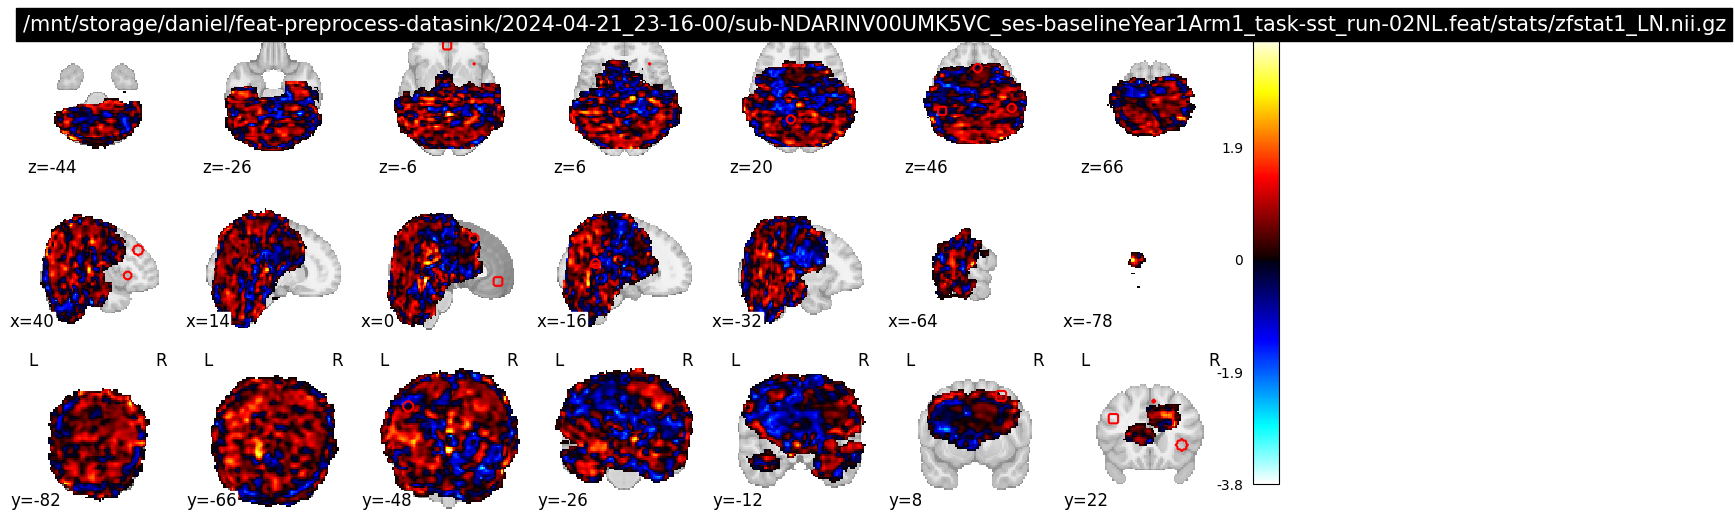

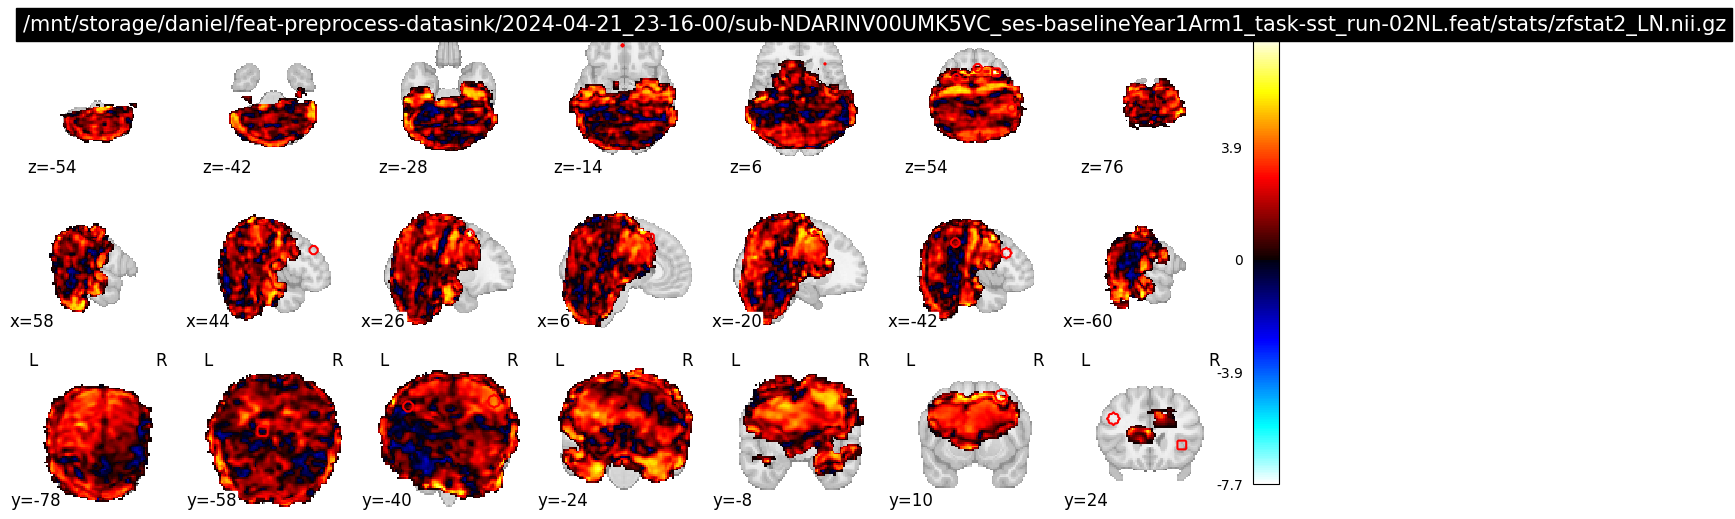

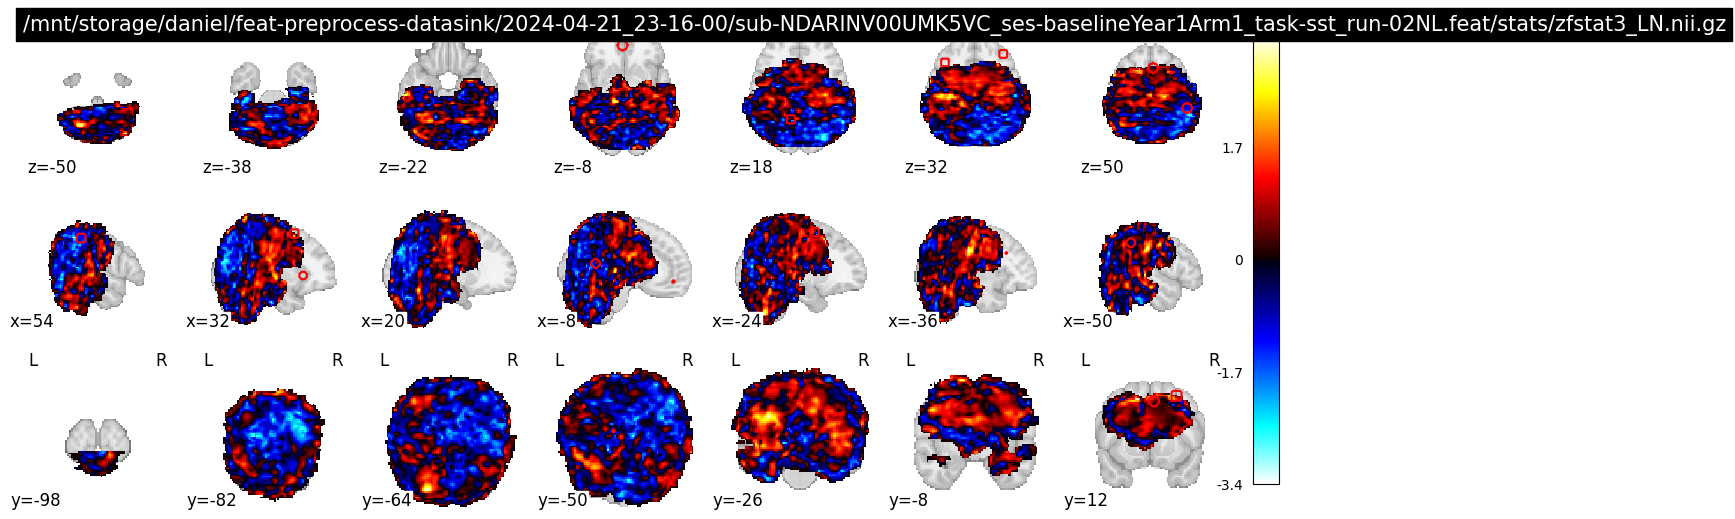

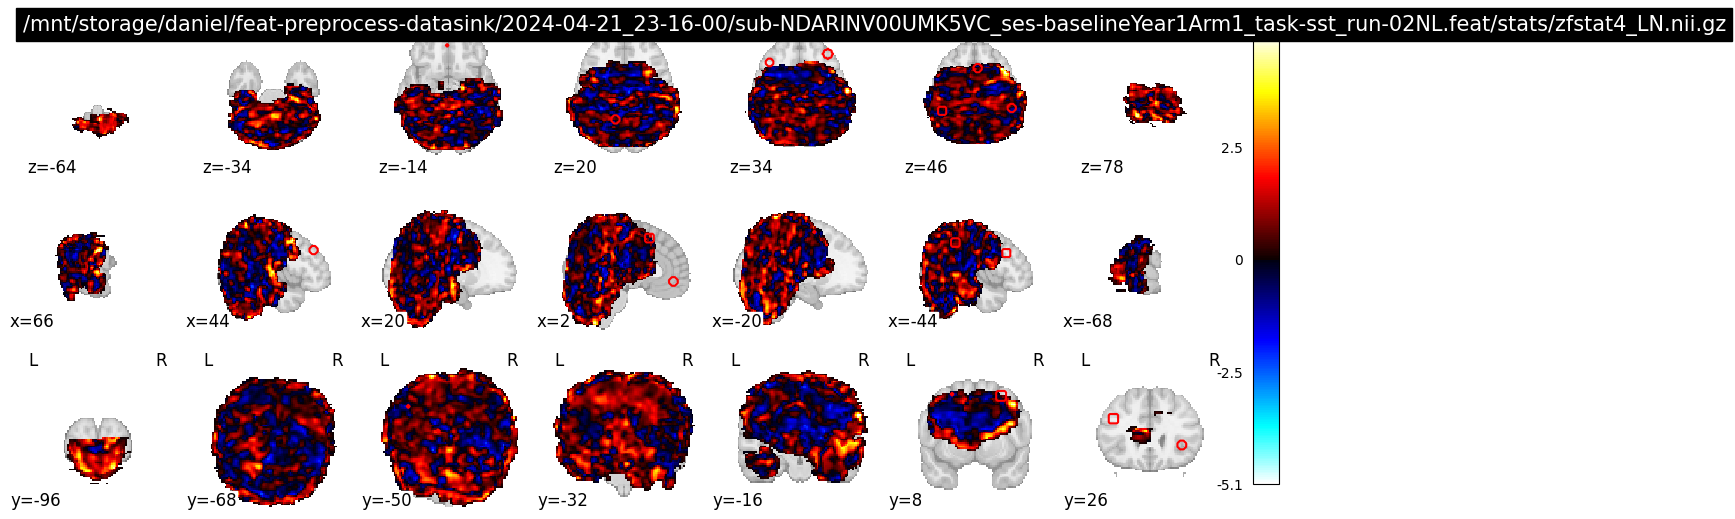

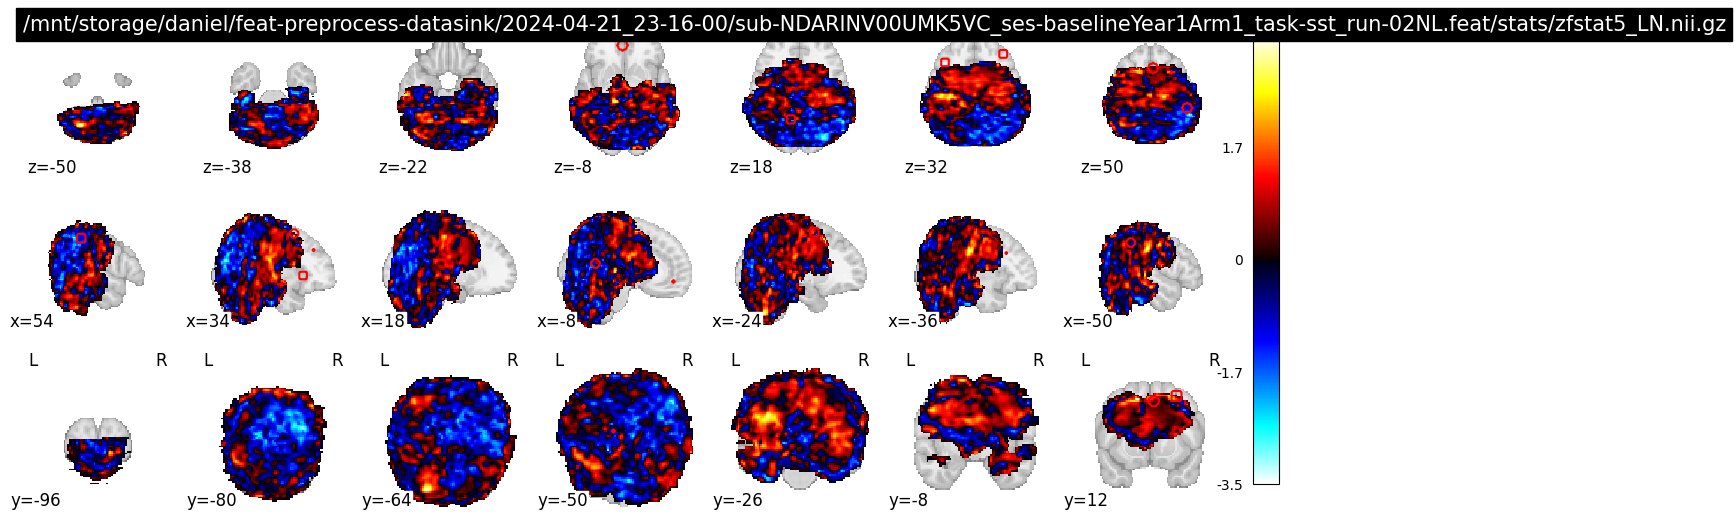

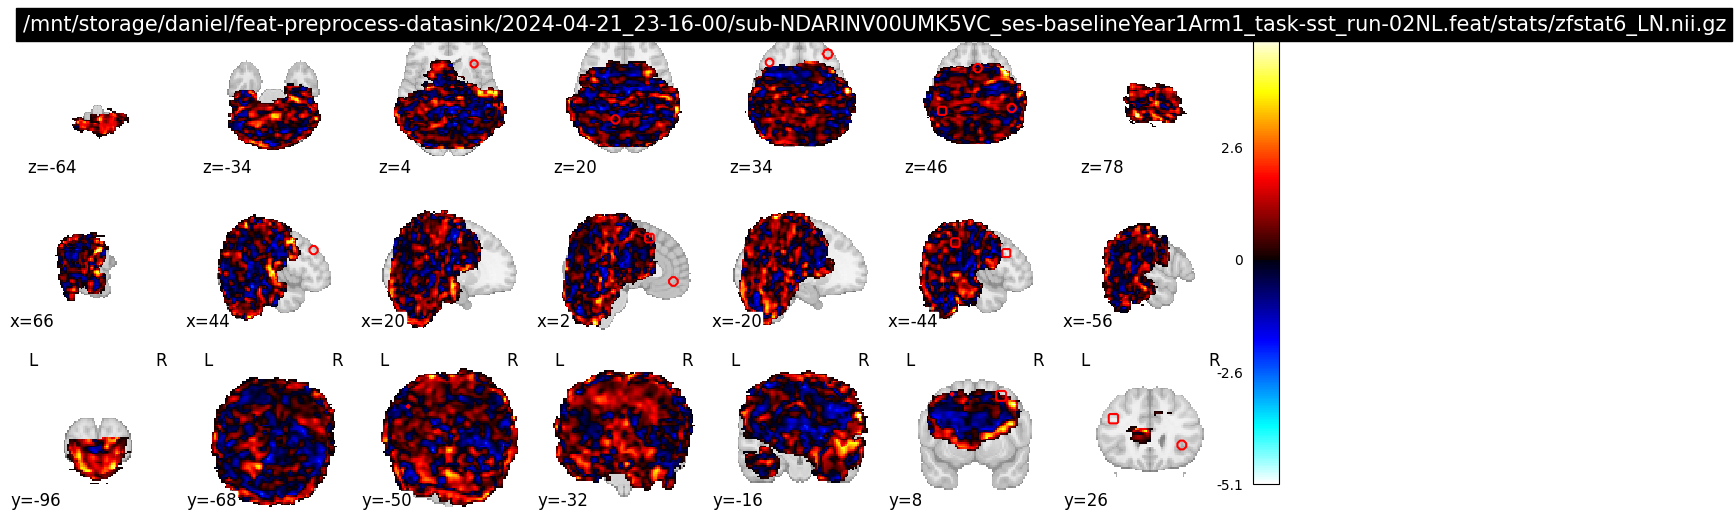

In [74]:
import constants
import utils
from nilearn import plotting, image

def get_linear_zfstat_paths(subject_id: str, run: int, session: str, feat_datasink: str) -> tuple:        
    zfstat_paths = utils.get_zfstat_paths(feat_datasink, session, subject_id, run, type="linear", linear_feat=False)
    
    return zfstat_paths

def plot_zfstat_paths(zfstat_paths: list):
    for zfstat_path in zfstat_paths:
        zfstat_image = image.load_img(zfstat_path)
        plot = plotting.plot_stat_map(zfstat_image, display_mode='mosaic',  title=f"{zfstat_path}")
        
        # plot roi 
        roi_file = "grantmask_labeled.nii"
        
        # https://nilearn.github.io/dev/plotting/index.html#adding-overlays-edges-contours-contour-fillings-markers-scale-bar
        plot.add_contours(roi_file, levels=[1], colors='r')

combo = {
    "subject_id": "NDARINV00UMK5VC",
    "run": 2,
    "session": "baselineYear1Arm1"
}

def get_grouped_for_combo(combo: dict, df: pd.DataFrame) -> pd.DataFrame:
    grouped = df[(df["subject_id"] == combo["subject_id"]) & (df["run"] == combo["run"]) & (df["session"] == combo["session"])].groupby(["roi_num", "roi_value"]).size().reset_index(name="count")
    
    return grouped



# NDARINVXTRHH68Z, baselineYear1Arm1, run 2
zfstat_paths = get_linear_zfstat_paths(combo["subject_id"], combo["run"], combo["session"], constants.INPUT_FEAT_DATASINK)

get_grouped_for_combo(combo, df_with_coords)

plot_zfstat_paths(zfstat_paths)

In [42]:
averaged_df = df_with_coords.groupby(["session", "subject_id", "image_name", "run", "roi_num"]).mean().reset_index()

averaged_df.rename(columns={"roi_value": "avg"}, inplace=True)

averaged_df

session       subject_id     image_name  run  roi_num  \
0      2YearFollowUpYArm1  NDARINV00CY2MDM          corGo    1        1   
1      2YearFollowUpYArm1  NDARINV00CY2MDM          corGo    1        2   
2      2YearFollowUpYArm1  NDARINV00CY2MDM          corGo    1        3   
3      2YearFollowUpYArm1  NDARINV00CY2MDM          corGo    1        4   
4      2YearFollowUpYArm1  NDARINV00CY2MDM          corGo    1        5   
...                   ...              ...            ...  ...      ...   
42565   baselineYear1Arm1  NDARINVZT44Y065  incStopvcorGo    2        7   
42566   baselineYear1Arm1  NDARINVZT44Y065  incStopvcorGo    2        8   
42567   baselineYear1Arm1  NDARINVZT44Y065  incStopvcorGo    2        9   
42568   baselineYear1Arm1  NDARINVZT44Y065  incStopvcorGo    2       10   
42569   baselineYear1Arm1  NDARINVZT44Y065  incStopvcorGo    2       11   

            avg  x_coord  y_coord  z_coord  is_nonlinear  
0      0.934333     61.0     75.0     37.0           0.0  
1      0.684735     27.0     74.0     36.0           0.0  
2     -0.587847     66.0     75.0     51.0           0.0  
3      0.300729     25.0     81.0     53.0           0.0  
4     -0.456265     58.0     64.0     65.0           0.0  
...         ...      ...      ...      ...           ...  
42565  0.231942     68.0     41.0     58.0           0.0  
42566  1.382581     19.0     43.0     61.0           0.0  
42567  0.327891     51.0     35.0     44.0           0.0  
42568  0.112282     46.0     87.0     32.0           0.0  
42569  0.283451     43.0     71.0     61.0           0.0  

[42570 rows x 10 columns]

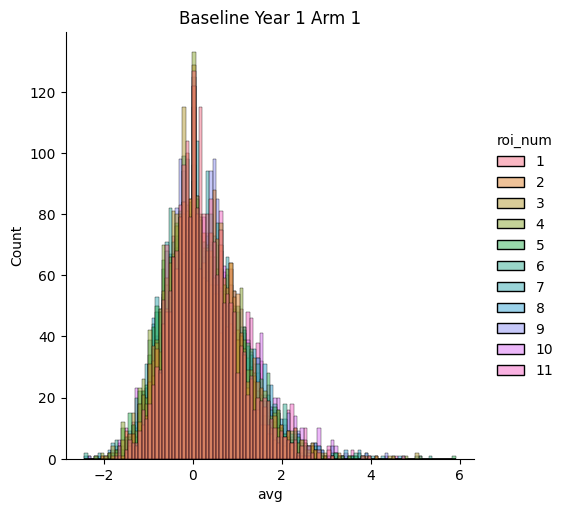

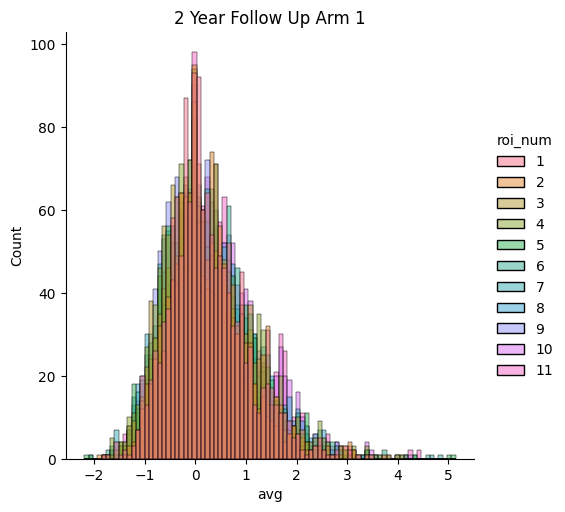

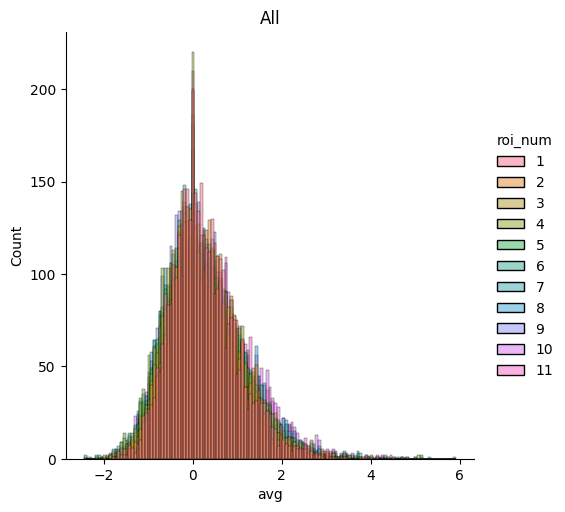

In [44]:
import seaborn as sns

# filter by group = pilot_anx
# f1 = sns.displot(averaged_df[averaged_df["group"] == "pilot_anx"].astype({"roi_num":"category"}), x="avg", hue="roi_num", kind="hist")
# f1.set(title="Pilot Anx")

# f2 = sns.displot(averaged_df[averaged_df["group"] == "original_50"].astype({"roi_num":"category"}), x="avg", hue="roi_num", kind="hist")
# f2.set(title="Original 50")

# filter by session
f3 = sns.displot(averaged_df[averaged_df["session"] == "baselineYear1Arm1"].astype({"roi_num":"category"}), x="avg", hue="roi_num", kind="hist")
f3.set(title="Baseline Year 1 Arm 1")

f4 = sns.displot(averaged_df[averaged_df["session"] == "2YearFollowUpYArm1"].astype({"roi_num":"category"}), x="avg", hue="roi_num", kind="hist")
f4.set(title="2 Year Follow Up Arm 1")

# all
f5 = sns.displot(averaged_df.astype({"roi_num":"category"}), x="avg", hue="roi_num", kind="hist")
f5.set(title="All")